In [22]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handige Jupyter magic
%config IPCompleter.greedy = True
%matplotlib inline

In [23]:
v_2020 = pd.read_csv('./vektis/vektis_2020.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2019 = pd.read_csv('./vektis/vektis_2019.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2018 = pd.read_csv('./vektis/vektis_2018.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2017 = pd.read_csv('./vektis/vektis_2017.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2016 = pd.read_csv('./vektis/vektis_2016.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2015 = pd.read_csv('./vektis/vektis_2015.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2014 = pd.read_csv('./vektis/vektis_2014.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2013 = pd.read_csv('./vektis/vektis_2013.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2012 = pd.read_csv('./vektis/vektis_2012.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)
v_2011 = pd.read_csv('./vektis/vektis_2011.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str, 'postcode_3': float}, low_memory=False)

In [24]:
v_2020['jaar'] = 2020
v_2019['jaar'] = 2019
v_2018['jaar'] = 2018
v_2017['jaar'] = 2017
v_2016['jaar'] = 2016
v_2015['jaar'] = 2015
v_2014['jaar'] = 2014
v_2013['jaar'] = 2013
v_2012['jaar'] = 2012
v_2011['jaar'] = 2011

# make all column labels lowercase
v_2020.columns = v_2020.columns.str.lower()
v_2019.columns = v_2019.columns.str.lower()
v_2018.columns = v_2018.columns.str.lower()
v_2017.columns = v_2017.columns.str.lower()
v_2016.columns = v_2016.columns.str.lower()
v_2015.columns = v_2015.columns.str.lower()
v_2014.columns = v_2014.columns.str.lower()
v_2013.columns = v_2013.columns.str.lower()
v_2012.columns = v_2012.columns.str.lower()
v_2011.columns = v_2011.columns.str.lower()

# pandas set max rows
pd.set_option('display.max_rows', 1000)

# combine all years into one dataframe
vektis = pd.concat([v_2020, v_2019, v_2018, v_2017, v_2016, v_2015, v_2014, v_2013, v_2012, v_2011], ignore_index=True)

vektis = vektis[vektis['leeftijdsklasse'] != '90+']
vektis['kosten_overig'] = vektis['kosten_eerstelijnsverblijf'] + vektis['kosten_gzsp'] + vektis['kosten_overig']
vektis = vektis.drop(columns=['kosten_gzsp', 'kosten_eerstelijnsverblijf'])

vektis

,geslacht,leeftijdsklasse,postcode_3,aantal_bsn,aantal_verzekerdejaren,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,...,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar,kosten_tweedelijns_ggz,kosten_eerstelijns_psychologische_zorg
0,M,36,753.0,208,206.07,57235.06,12422.63,27442.25,12942.27,5057.54,...,3740.11,0.00,589.91,0.00,0.00,0.00,0.00,2020,NaN,NaN
1,M,35,290.0,386,382.27,127924.67,38068.70,110943.17,26591.05,9303.68,...,3659.15,57983.66,69.24,0.00,6227.55,895.98,4073.59,2020,NaN,NaN
2,M,33,683.0,208,202.46,100130.83,26515.55,140462.90,14241.00,6955.29,...,6283.54,0.00,0.00,0.00,0.00,0.00,0.00,2020,NaN,NaN
3,M,58,692.0,208,207.75,491693.09,61234.29,25501.81,14189.33,6965.44,...,2010.41,0.00,0.00,0.00,0.00,39688.04,108.98,2020,NaN,NaN
4,M,51,762.0,208,207.07,155556.22,36695.79,0.00,13821.79,5915.35,...,4948.27,0.00,273.56,0.00,0.00,1495.92,16.76,2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366467,V,9,995.0,83,82.59,14527.98,2237.48,NaN,5031.63,1291.74,...,NaN,NaN,51.66,3.78,NaN,NaN,NaN,2011,26758.32,2176.26
1366468,V,9,996.0,32,32.00,4222.33,765.06,NaN,1932.95,457.92,...,NaN,NaN,0.00,0.00,NaN,NaN,NaN,2011,7648.34,0.00
1366469,V,9,997.0,28,28.00,1902.59,583.10,NaN,1656.47,282.26,...,NaN,NaN,0.00,2.52,NaN,NaN,NaN,2011,6067.09,0.00
1366470,V,9,998.0,87,86.32,21409.56,3580.02,NaN,5176.29,1696.83,...,NaN,NaN,61.09,3.78,NaN,NaN,NaN,2011,24764.55,0.00


<AxesSubplot:xlabel='leeftijdsklasse', ylabel='kosten_huisarts_consult_per_bsn'>

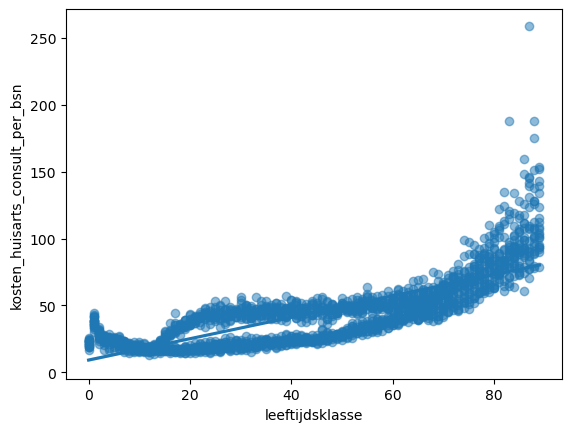

In [25]:
# convert postcode_3 to int
vektis_200 = vektis[['kosten_huisarts_consult', 'jaar', 'leeftijdsklasse', 'aantal_bsn', 'postcode_3']].dropna()
vektis_200['kosten_huisarts_consult_per_bsn'] = vektis_200['kosten_huisarts_consult'] / vektis_200['aantal_bsn']

vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] != '90+']
vektis_200['leeftijdsklasse'] = vektis_200['leeftijdsklasse'].astype(int)
vektis_200 = vektis_200[vektis_200['postcode_3'] == 290.0]

sns.regplot(y='kosten_huisarts_consult_per_bsn', x='leeftijdsklasse', data=vektis_200, fit_reg=True, scatter_kws={'alpha':0.5})

# sns.lineplot(x='leeftijdsklasse', y='kosten_farmacie', data=vektis_200, ci=None)











<AxesSubplot:>

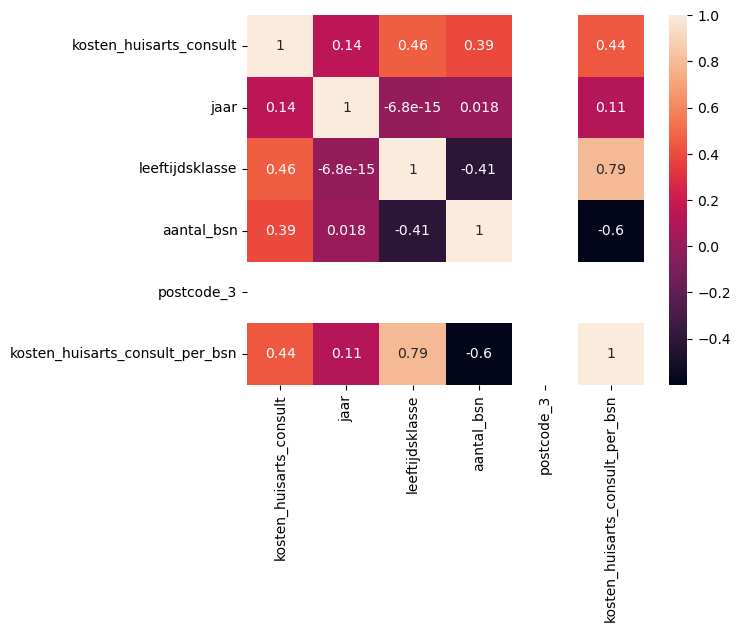

In [26]:
sns.heatmap(vektis_200.corr(), annot=True)

In [27]:
import statsmodels.formula.api as smf

modWt = smf.ols(formula='kosten_huisarts_consult_per_bsn ~ leeftijdsklasse', data=vektis_200).fit()
print(modWt.summary())

                                   OLS Regression Results                                  
Dep. Variable:     kosten_huisarts_consult_per_bsn   R-squared:                       0.623
Model:                                         OLS   Adj. R-squared:                  0.623
Method:                              Least Squares   F-statistic:                     2969.
Date:                             Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                                     11:32:54   Log-Likelihood:                -7561.0
No. Observations:                             1800   AIC:                         1.513e+04
Df Residuals:                                 1798   BIC:                         1.514e+04
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.9

Memo: Kijken naar non lineaire regressie

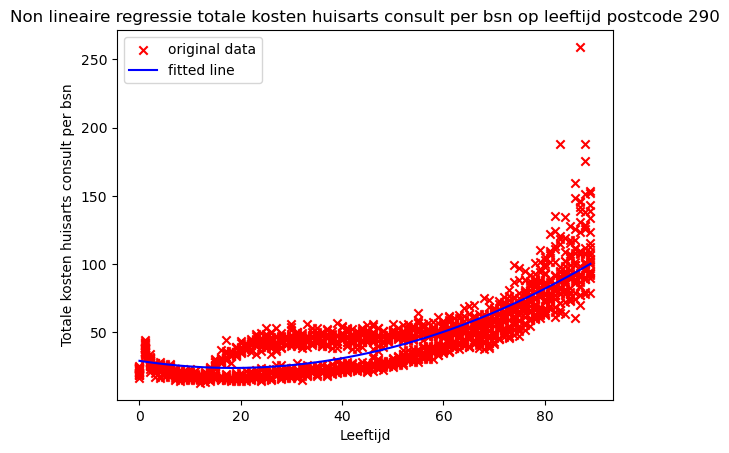

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


vektis_200 = vektis[['kosten_huisarts_consult', 'jaar', 'leeftijdsklasse', 'aantal_bsn', 'postcode_3']].dropna()
vektis_200['kosten_huisarts_consult_per_bsn'] = vektis_200['kosten_huisarts_consult'] / vektis_200['aantal_bsn']

vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] != '90+']
vektis_200['leeftijdsklasse'] = vektis_200['leeftijdsklasse'].astype(int)
vektis_200 = vektis_200[vektis_200['postcode_3'] == 290.0]

# this is the function we want to fit
def func(x, a, b, c):
    return a*x*x + b*x + c

x_values = vektis_200['leeftijdsklasse']
y_values = vektis_200['kosten_huisarts_consult_per_bsn']

fig, ax = plt.subplots()
fig.set_dpi(100.0)

ax.scatter(x_values, y_values, c="red", marker="x", label="original data")

# non-linear least squares to fit func to data
p_opt, p_cov = curve_fit(func, x_values, y_values)

# these are the fitted values a, b, c
a, b, c = p_opt

x_fit = np.linspace(min(x_values), max(x_values), 100)

# compute fitted y values
y_fit = [func(x, a, b, c) for x in x_fit]

ax.plot(x_fit, y_fit, c="blue", label="fitted line")

ax.set_xlabel("Leeftijd")
ax.set_ylabel("Totale kosten huisarts consult per bsn")
ax.set_title("Non lineaire regressie totale kosten huisarts consult per bsn op leeftijd postcode 290")
ax.legend()

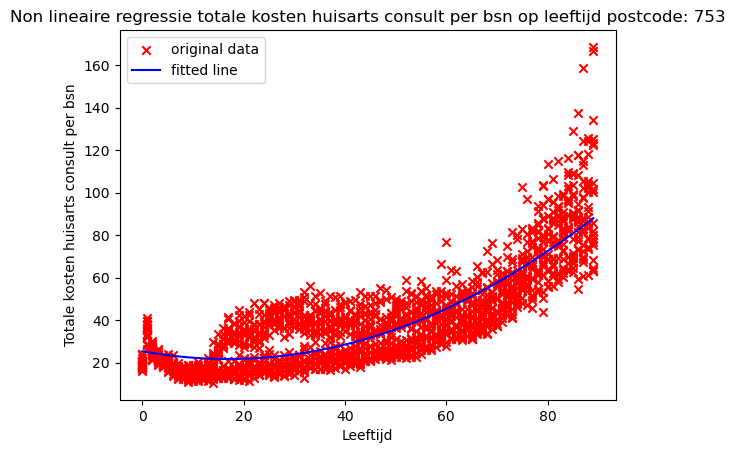

In [29]:
vektis_200 = vektis[['kosten_huisarts_consult', 'jaar', 'leeftijdsklasse', 'aantal_bsn', 'postcode_3']].dropna()
vektis_200['kosten_huisarts_consult_per_bsn'] = vektis_200['kosten_huisarts_consult'] / vektis_200['aantal_bsn']

vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] != '90+']
vektis_200['leeftijdsklasse'] = vektis_200['leeftijdsklasse'].astype(int)
vektis_200 = vektis_200[vektis_200['postcode_3'] == 753.0]

# this is the function we want to fit
def func(x, a, b, c):
    return a*x*x + b*x + c

x_values = vektis_200['leeftijdsklasse']
y_values = vektis_200['kosten_huisarts_consult_per_bsn']

fig, ax = plt.subplots()
fig.set_dpi(100.0)

ax.scatter(x_values, y_values, c="red", marker="x", label="original data")

# non-linear least squares to fit func to data
p_opt, p_cov = curve_fit(func, x_values, y_values)

# these are the fitted values a, b, c
a, b, c = p_opt

x_fit = np.linspace(min(x_values), max(x_values), 100)

# compute fitted y values
y_fit = [func(x, a, b, c) for x in x_fit]

ax.plot(x_fit, y_fit, c="blue", label="fitted line")

ax.set_xlabel("Leeftijd")
ax.set_ylabel("Totale kosten huisarts consult per bsn")
ax.set_title("Non lineaire regressie totale kosten huisarts consult per bsn op leeftijd postcode: 753")
ax.legend()

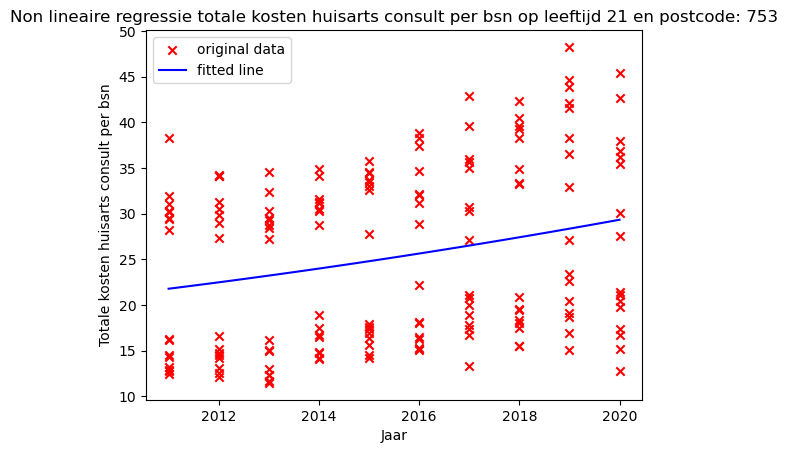

In [30]:
vektis_200 = vektis[['kosten_huisarts_consult', 'jaar', 'leeftijdsklasse', 'aantal_bsn', 'postcode_3']].dropna()
vektis_200['kosten_huisarts_consult_per_bsn'] = vektis_200['kosten_huisarts_consult'] / vektis_200['aantal_bsn']

vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] != '90+']
vektis_200['leeftijdsklasse'] = vektis_200['leeftijdsklasse'].astype(int)
vektis_200 = vektis_200[vektis_200['postcode_3'] == 753.0]
vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] > 15]
vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] < 24]

# this is the function we want to fit
def func(x, a, b, c):
    return a*x*x + b*x + c

x_values = vektis_200['jaar']
y_values = vektis_200['kosten_huisarts_consult_per_bsn']

fig, ax = plt.subplots()
fig.set_dpi(100.0)

ax.scatter(x_values, y_values, c="red", marker="x", label="original data")

# non-linear least squares to fit func to data
p_opt, p_cov = curve_fit(func, x_values, y_values)

# these are the fitted values a, b, c
a, b, c = p_opt

x_fit = np.linspace(min(x_values), max(x_values), 100)

# compute fitted y values
y_fit = [func(x, a, b, c) for x in x_fit]

ax.plot(x_fit, y_fit, c="blue", label="fitted line")

ax.set_xlabel("Jaar")
ax.set_ylabel("Totale kosten huisarts consult per bsn")
ax.set_title("Non lineaire regressie totale kosten huisarts consult per bsn op leeftijd 21 en postcode: 753")
ax.legend()

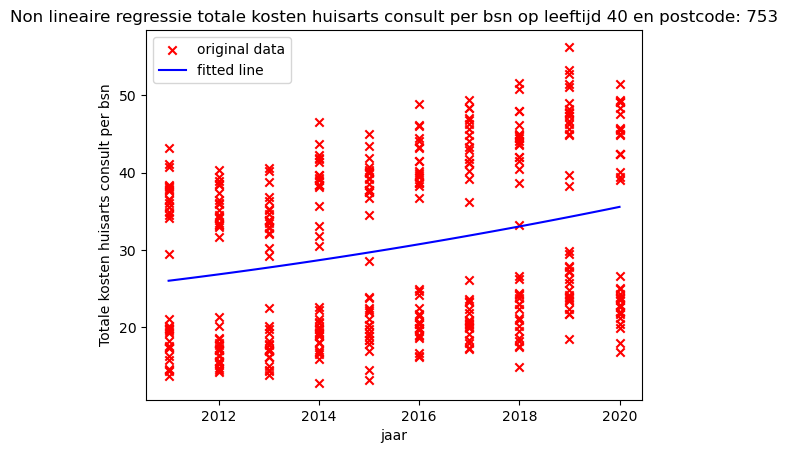

In [31]:
vektis_200 = vektis[['kosten_huisarts_consult', 'jaar', 'leeftijdsklasse', 'aantal_bsn', 'postcode_3']].dropna()
vektis_200['kosten_huisarts_consult_per_bsn'] = vektis_200['kosten_huisarts_consult'] / vektis_200['aantal_bsn']

vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] != '90+']
vektis_200['leeftijdsklasse'] = vektis_200['leeftijdsklasse'].astype(int)
vektis_200 = vektis_200[vektis_200['postcode_3'] == 753.0]
vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] > 22]
vektis_200 = vektis_200[vektis_200['leeftijdsklasse'] < 41]

# this is the function we want to fit
def func(x, a, b, c):
    return a*x*x + b*x + c

x_values = vektis_200['jaar']
y_values = vektis_200['kosten_huisarts_consult_per_bsn']

fig, ax = plt.subplots()
fig.set_dpi(100.0)

ax.scatter(x_values, y_values, c="red", marker="x", label="original data")

# non-linear least squares to fit func to data
p_opt, p_cov = curve_fit(func, x_values, y_values)

# these are the fitted values a, b, c
a, b, c = p_opt

x_fit = np.linspace(min(x_values), max(x_values), 100)

# compute fitted y values
y_fit = [func(x, a, b, c) for x in x_fit]

ax.plot(x_fit, y_fit, c="blue", label="fitted line")

ax.set_xlabel("jaar")
ax.set_ylabel("Totale kosten huisarts consult per bsn")
ax.set_title("Non lineaire regressie totale kosten huisarts consult per bsn op leeftijd 40 en postcode: 753")
ax.legend()

In [32]:
from scipy.stats import sem

# calculate the standard error of the mean
sem(vektis_200['kosten_huisarts_consult_per_bsn'])


0.5978212592289194

In [33]:
import statistics 
print("Standard Deviation of the sample is % s "%(statistics.stdev(vektis_200['kosten_huisarts_consult_per_bsn'])))



Standard Deviation of the sample is 11.342860877000048 
